In [1]:

import numpy as np 
import sys

    
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import matplotlib as mpl
from scipy import signal #for filtering
print("Modules imported")




Modules imported


In [2]:
# velocity = data.horizontalVelX.isel(time=40, nSCHISM_vgrid_layers=0).values

import re 
file="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/station.in"
station_id =[]
with open(file) as f:
    f.readline()
    for station in range(int(f.readline())):
        line = f.readline()
        if '!' in line:
            station_id.append(line.split('!')[-1])
        else:
            station_id.append(None)
# print(station_id)

print(len(station_id))

stations = []
for sublist in station_id:
    match = re.search(r'"(.*?)"', sublist)
    if match:
        stations.append(match.group(1).strip())
    else :
        stations.append(sublist.replace("\n", "").strip())
print(len(set(stations)))


for i, station in enumerate(stations):
    print("%d == %s" % (i,station))


306
277
0 == San Joaquin at Antioch
1 == Mokelumne River at Benson's Ferry
2 == Cache Slough
3 == Cache Creek at Yolo
4 == Old River at Coney Island
5 == Clifton Court
6 == Discovery Bay at Indian Slough
7 == Doughty Cut above Grant Line Canal
8 == Sacramento River at Emmaton
9 == Sacramento River at Emmaton
10 == emm upper Emmaton
11 == emm lower Emmaton
12 == Farrar Park
13 == Grant Line Canal at Tracy Rd Bridge
14 == Green's Landing
15 == Harvey O Banks PP
16 == Holland Tract
17 == Harvey O Banks PP
18 == CCWD Old River near Discovery Bay
19 == CCWD Rock Slough PP
20 == Italian Slough Headwater near Byron
21 == Jersey Point
22 == Sacramento River at Mallard Island
23 == Sacramento River at Mallard Island
24 == Middle River at Howard Rd Bridge
25 == San Joaquin at Mossdale Bridge
26 == Middle River at Tracy Blvd
27 == Old River Barrier near DMC (Above)
28 == Old River below Dam
29 == Old River at Bacon Island
30 == Old River at Head
31 == Old River at Byron
32 == Prisoners Point
33 =

In [3]:
import pandas as pd

columns = ['time']
stations_no = [str(i) for i in range(307)]
columns = columns + stations_no



# These outputs are invoked with iout_sta=1, and are found in outputs/staout_[1..,9], corresponding respectively to elev, air pressure, wind u, wind v, T, S, u, v, w. Each output has a simple ASCII format:
# Time(sec), variable @ station 1,2,…. (specified in station.in)

#file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs_barotropic/staout_1"
file="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/outputs/staout_1"# 1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
data = pd.read_csv(file, sep='\s+', names=columns,dtype=np.float32) #, decode_times=False)
#data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("01-01-2017 00:00:00") + i for i in timedelta]
    
data["time"] = timestamp



In [4]:
data.time[26000]

Timestamp('2017-06-30 13:30:00')

In [5]:
# pd.read_csv('/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/outputs/staout_1', sep='\s+', dtype=np.float32,names=columns)


Axes(0.125,0.11;0.775x0.77)


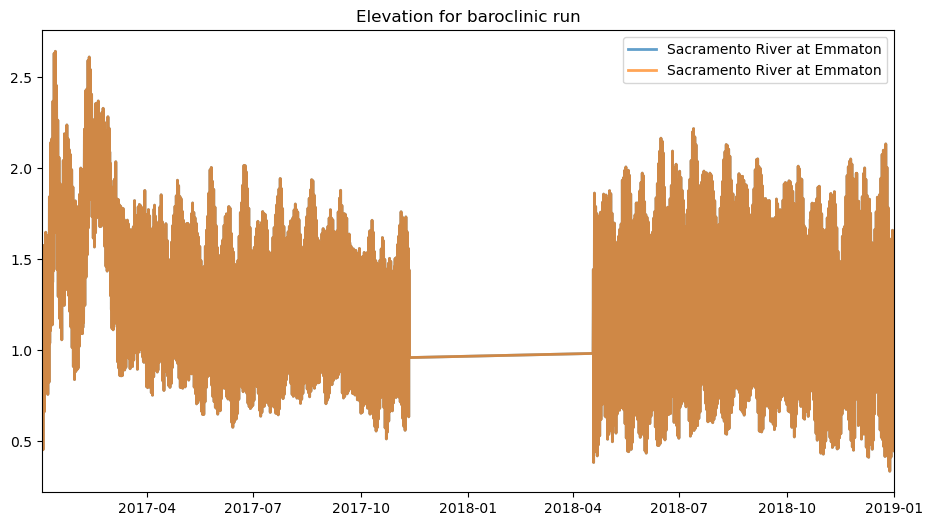

In [6]:
# Make a plot
plt.ioff()

#station_indices=[0, 208, 2, 62, 105]
#station_indices=[47,48,56,7,8,9] #first are 2 martinez, then Old River near Clifton court intake, last 3 are emmaton
station_indices=[8,9]#47,48,56,7,8,9,]
fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Elevation for baroclinic run")
plt.show()
# ax.grid()


Axes(0.125,0.11;0.775x0.77)


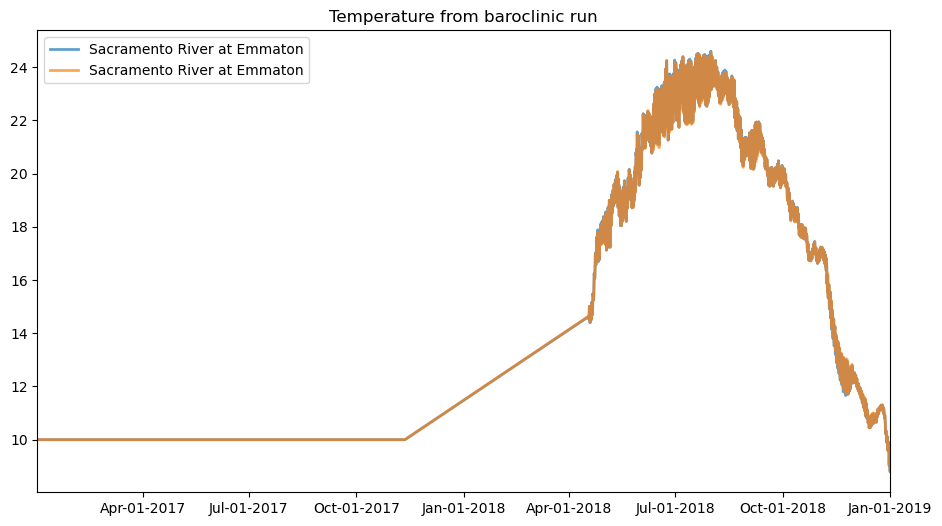

In [7]:
file="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/outputs/staout_5" #1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("01-01-2017 00:00") + i for i in timedelta]
    
data["time"] = timestamp


fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Temperature from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.show()
# ax.grid()

Axes(0.125,0.11;0.775x0.77)


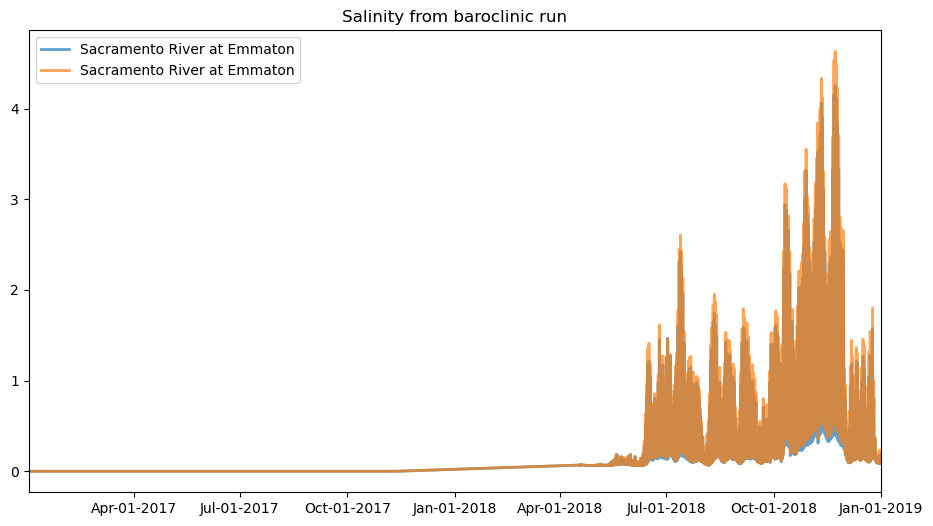

In [8]:
file="//expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/outputs/staout_6" #1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("01-01-2017 00:00") + i for i in timedelta]
    
data["time"] = timestamp


fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.show()
# ax.grid()

In [9]:
# #convert from PSU to uS/cm (at Emmaton the limit is 1000 uS/cm)
# from vtools.functions.unit_conversions import cfs_to_cms, ft_to_m, ec_psu_25c, fahrenheit_to_celsius
# std= ec_psu_25c(1000)
# print(std)

In [10]:
#make a plot with upper Emmaton from the historical and 2 slr studies with a line for the standard
#set the x axis to exclude the first 90 days

file1="//expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/outputs/staout_6" #1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
file2="//expanse/lustre/scratch/jisrael/temp_project/run_schism/run_3/outputs/staout_6"
file3="//expanse/lustre/scratch/jisrael/temp_project/run_schism/run_4/outputs/staout_6"
data1 = pd.read_csv(file1, sep='\s+', names=columns) #, decode_times=False)
data1 = data1.apply(pd.to_numeric)
data2 = pd.read_csv(file2, sep='\s+', names=columns) #, decode_times=False)
data2 = data2.apply(pd.to_numeric)
data3 = pd.read_csv(file3, sep='\s+', names=columns) #, decode_times=False)
data3 = data3.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta1 = [pd.Timedelta(i, unit = 's') for i in data1.time]
timestamp1 = [pd.to_datetime("01-01-2017 00:00") + i for i in timedelta1]    
data1["time"] = timestamp1

timedelta2 = [pd.Timedelta(i, unit = 's') for i in data2.time]
timestamp2 = [pd.to_datetime("01-01-2017 00:00") + i for i in timedelta2]
data2["time"] = timestamp2

timedelta3 = [pd.Timedelta(i, unit = 's') for i in data3.time]
timestamp3 = [pd.to_datetime("01-01-2017 00:00") + i for i in timedelta3]
data3["time"] = timestamp3



In [11]:
data1.time[52000]

Timestamp('2018-06-26 16:15:00')

Axes(0.125,0.11;0.775x0.77)


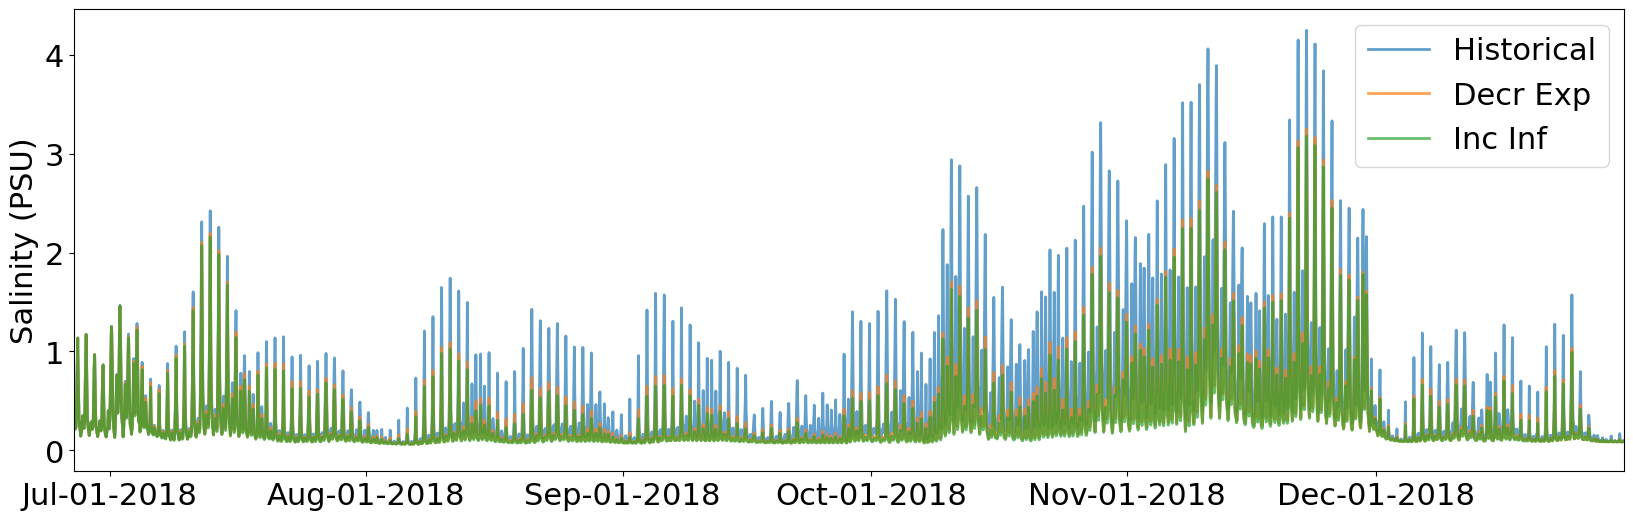

In [12]:
station_indices=[8]
fig = plt.figure(figsize=(20,6))
mpl.rcParams.update({'font.size': 22})
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values1 = data1[str(idx)]
    values2 = data2[str(idx)]
    values3 = data3[str(idx)]
    ax.plot(data1.time, values1, label = 'Historical', linewidth=2, alpha =0.7)
    ax.plot(data2.time, values2, label = 'Decr Exp', linewidth=2, alpha =0.7)
    ax.plot(data3.time, values3, label = 'Inc Inf', linewidth=2, alpha =0.7)

#ax.plot(data1.time,np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = ax.legend()
print(ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
#ax.set_xlim(data1.time.iloc[26000], data3.time.iloc[-1]) #July 1 to end
ax.set_xlim(data1.time[52000], data3.time.iloc[-1]) #July 1 to end
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")

ax.set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()



Axes(0.125,0.11;0.775x0.77)


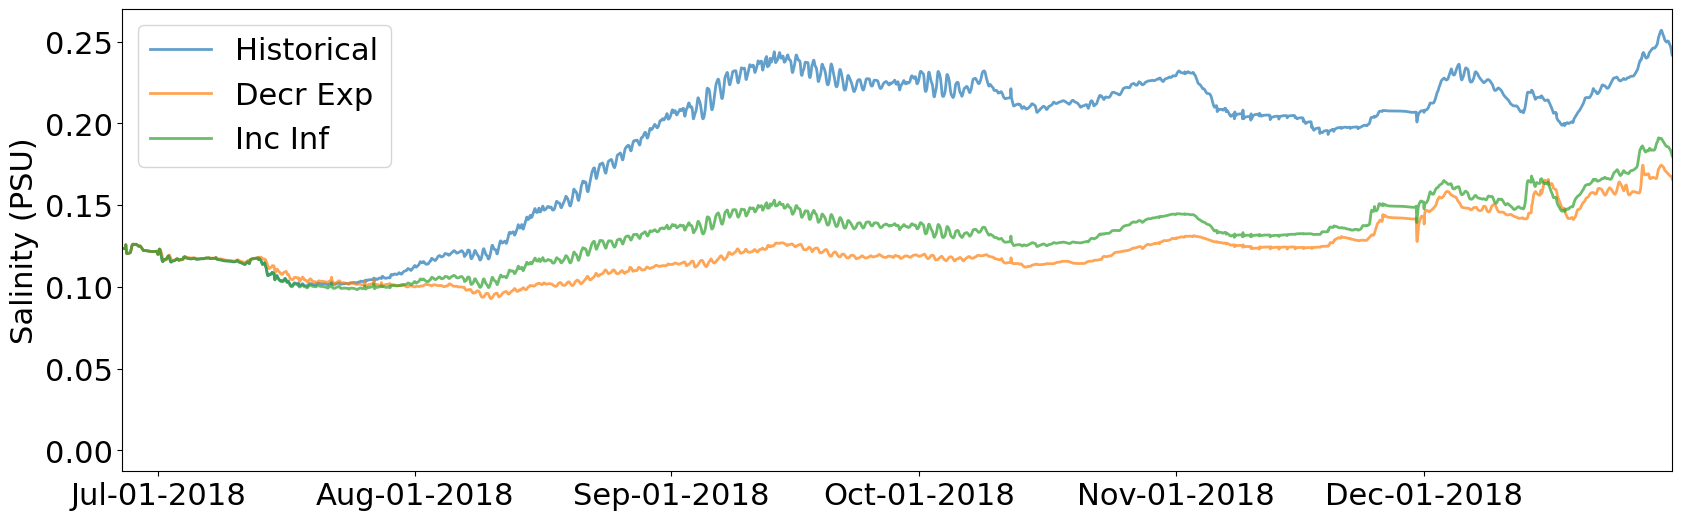

In [13]:
#plot another station
station_indices=[15]
fig = plt.figure(figsize=(20,6))
mpl.rcParams.update({'font.size': 22})
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values1 = data1[str(idx)]
    values2 = data2[str(idx)]
    values3 = data3[str(idx)]
    ax.plot(data1.time, values1, label = 'Historical', linewidth=2, alpha =0.7)
    ax.plot(data2.time, values2, label = 'Decr Exp', linewidth=2, alpha =0.7)
    ax.plot(data3.time, values3, label = 'Inc Inf', linewidth=2, alpha =0.7)

#ax.plot(data1.time,np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = ax.legend()
print(ax)
ax.set_xlim(data1.time.iloc[52000], data3.time.iloc[-1]) #July 1 to end
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
ax.set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()



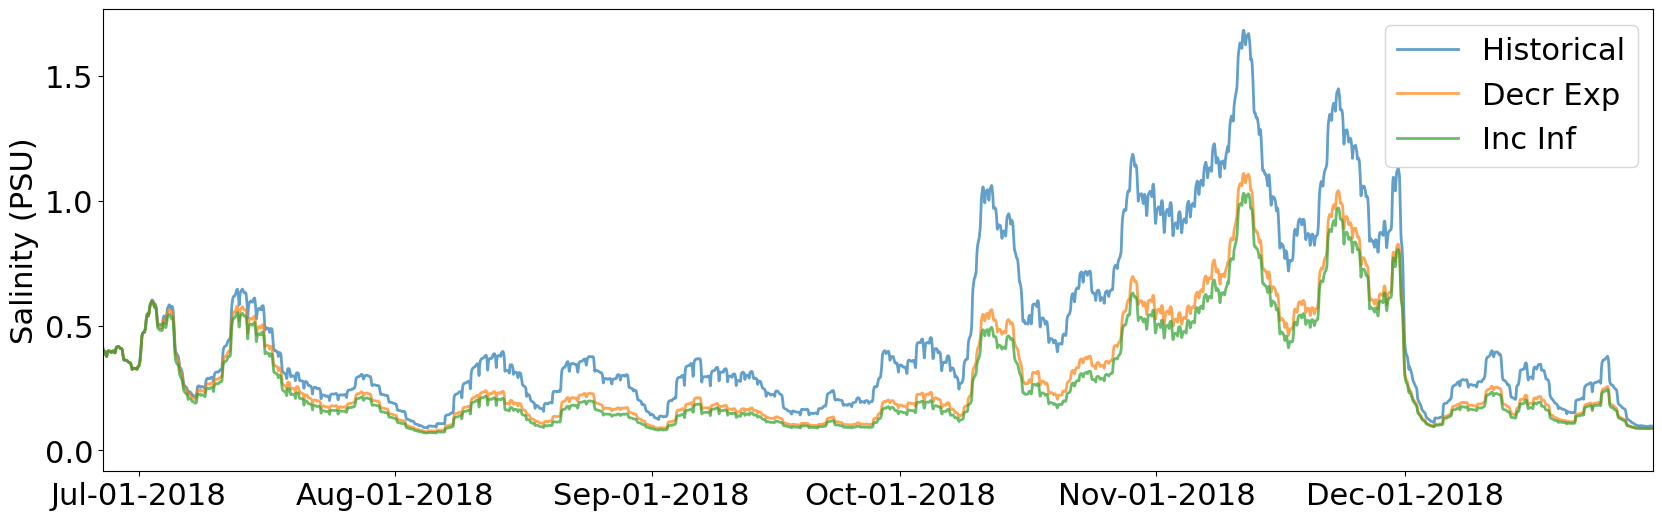

In [14]:
station_indices=[8]
fig = plt.figure(figsize=(20,6))
mpl.rcParams.update({'font.size': 22})
ax = plt.gca()
# ax.grid(alpha=0.5)
N=96
for idx in station_indices:
    #running average, currently frequency is every 15 min, so a 24 hr average would be every 96 samples
    
    values1=np.convolve(data1[str(idx)], np.ones(N)/N, mode='valid')
    values2=np.convolve(data2[str(idx)], np.ones(N)/N, mode='valid')
    values3=np.convolve(data3[str(idx)], np.ones(N)/N, mode='valid')
    #lose the first 96 elements so trim the time vector
    ax.plot(data1.time.iloc[95:], values1, label = 'Historical', linewidth=2, alpha =0.7)
    ax.plot(data2.time.iloc[95:], values2, label = 'Decr Exp', linewidth=2, alpha =0.7)
    ax.plot(data3.time.iloc[95:], values3, label = 'Inc Inf', linewidth=2, alpha =0.7)

#ax.plot(data1.time.iloc[95:],np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = ax.legend()
#print(ax)
ax.set_xlim(data1.time.iloc[52000], data3.time.iloc[-1]) #July 1 to end
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
ax.set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()



In [15]:
data1.time

0       2017-01-01 00:10:00
1       2017-01-01 00:20:00
2       2017-01-01 00:30:00
3       2017-01-01 00:40:00
4       2017-01-01 00:50:00
                ...        
70075   2018-12-31 23:00:00
70076   2018-12-31 23:15:00
70077   2018-12-31 23:30:00
70078   2018-12-31 23:45:00
70079   2019-01-01 00:00:00
Name: time, Length: 70080, dtype: datetime64[ns]

In [16]:
raw=data1[str(8)]

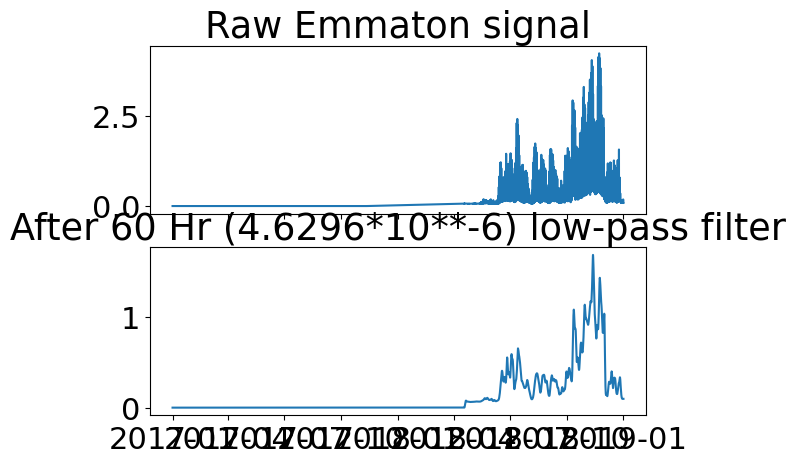

In [17]:
#Low pass filter the tidal signal
#sos = signal.butter(4, 6.944*10**-6, 'lp', fs=0.001111, output='sos') #sampling frequency in hz (15 minutes), below 40 hrs
#sos = signal.butter(4, 9.259*10**-6, 'lp', fs=0.001111, output='sos') #sampling frequency in hz (15 minutes), below 30 hrs
#sos = signal.butter(4, 4.6296*10**-6, 'lp', fs=0.001111, output='sos') #sampling frequency in hz (15 minutes), below 60 hrs
sos = signal.butter(4, 3.472*10**-6, 'lp', fs=0.001111, output='sos') #sampling frequency in hz (15 minutes), below 80 hrs
filtered = signal.sosfilt(sos,raw)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(data1.time, raw)

ax1.set_title('Raw Emmaton signal')
ax2.plot(data1.time, filtered)

ax2.set_title('After 60 Hr (4.6296*10**-6) low-pass filter')
plt.show()

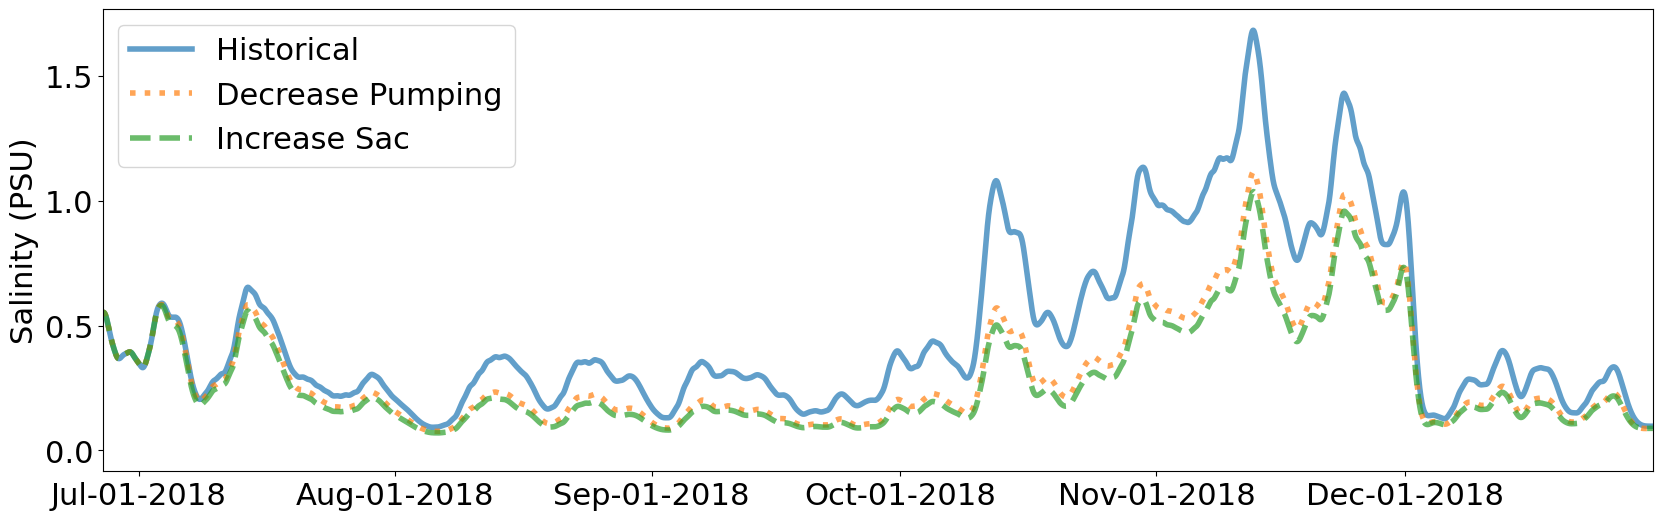

In [18]:
#try 4th order butterworth instead of average

station_indices=[8]
fig = plt.figure(figsize=(20,6))
mpl.rcParams.update({'font.size': 22})
ax = plt.gca()
# ax.grid(alpha=0.5)
#N=96
for idx in station_indices:
    #running average, currently frequency is every 15 min, so a 24 hr average would be every 96 samples
    
    values1=signal.sosfilt(sos,data1[str(idx)])
    values2=signal.sosfilt(sos,data2[str(idx)])
    values3=signal.sosfilt(sos,data3[str(idx)])
    #lose the first 96 elements so trim the time vector

    ax.plot(data1.time, values1, label = 'Historical', linewidth=4, alpha =0.7)
    ax.plot(data2.time, values2, label = 'Decrease Pumping', linewidth=4, alpha =0.7,linestyle=':')
    ax.plot(data3.time, values3, label = 'Increase Sac', linewidth=4, alpha =0.7,linestyle='--')

#ax.plot(data1.time,np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = ax.legend()
#print(ax)
ax.set_xlim(data1.time.iloc[52000], data3.time.iloc[-1]) #July 1 to 
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
ax.set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()



In [19]:
print(values1.max())
print(np.argmax(values1))


1.68396121488922
65345


In [20]:
print(data1.time.iloc[65345])

2018-11-12 16:30:00


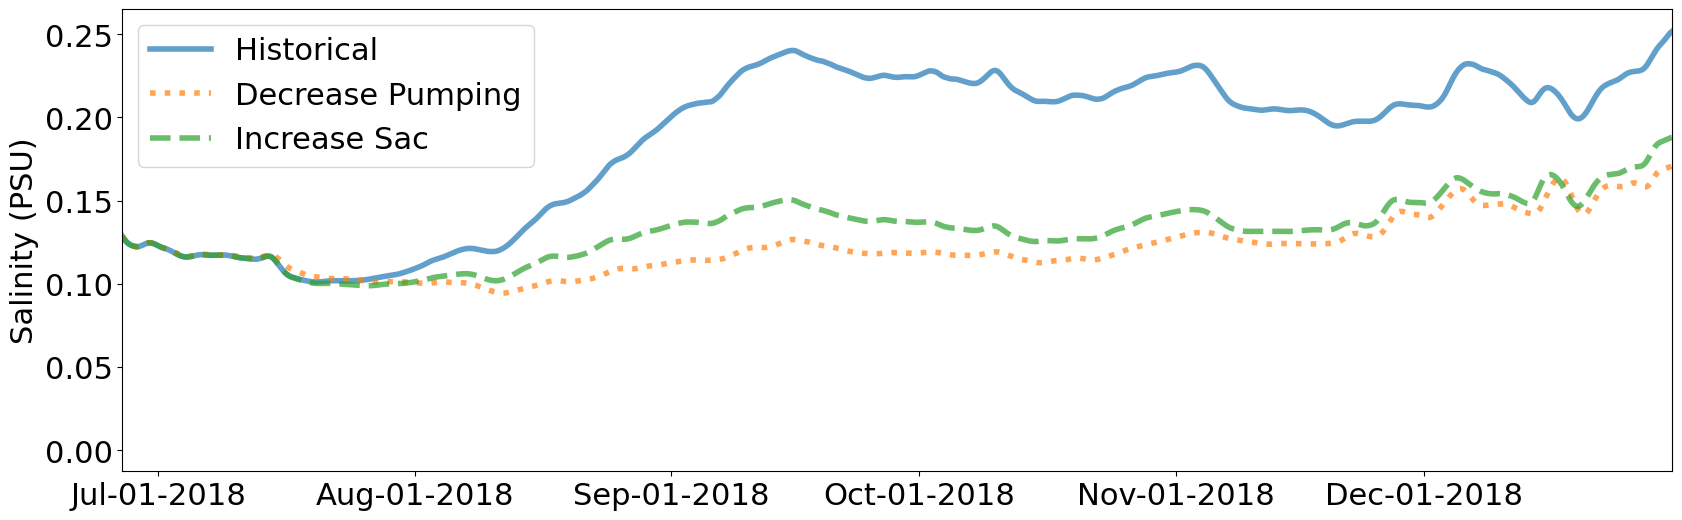

In [21]:
#try 4th order butterworth instead of average

station_indices=[15]
fig = plt.figure(figsize=(20,6))
mpl.rcParams.update({'font.size': 22})
ax = plt.gca()
# ax.grid(alpha=0.5)
#N=96
for idx in station_indices:
    #running average, currently frequency is every 15 min, so a 24 hr average would be every 96 samples
    
    values1=signal.sosfilt(sos,data1[str(idx)])
    values2=signal.sosfilt(sos,data2[str(idx)])
    values3=signal.sosfilt(sos,data3[str(idx)])
    #lose the first 96 elements so trim the time vector

    ax.plot(data1.time, values1, label = 'Historical', linewidth=4, alpha =0.7)
    ax.plot(data2.time, values2, label = 'Decrease Pumping', linewidth=4, alpha =0.7,linestyle=':')
    ax.plot(data3.time, values3, label = 'Increase Sac', linewidth=4, alpha =0.7,linestyle='--')

#ax.plot(data1.time,np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = ax.legend()
#print(ax)
ax.set_xlim(data1.time.iloc[52000], data3.time.iloc[-1]) #July 1 to end
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
ax.set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()



IMAGES TO EXPORT

#can we combine the 2 above in a subplot, fix the labels to be consistent with the others

In [22]:
dpi = 300
image_save_dpi = 450
image_format = "tif"

import matplotlib
import matplotlib_inline
%matplotlib inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
matplotlib.rcParams["figure.dpi"] = dpi
plt.rcParams['figure.dpi'] = dpi

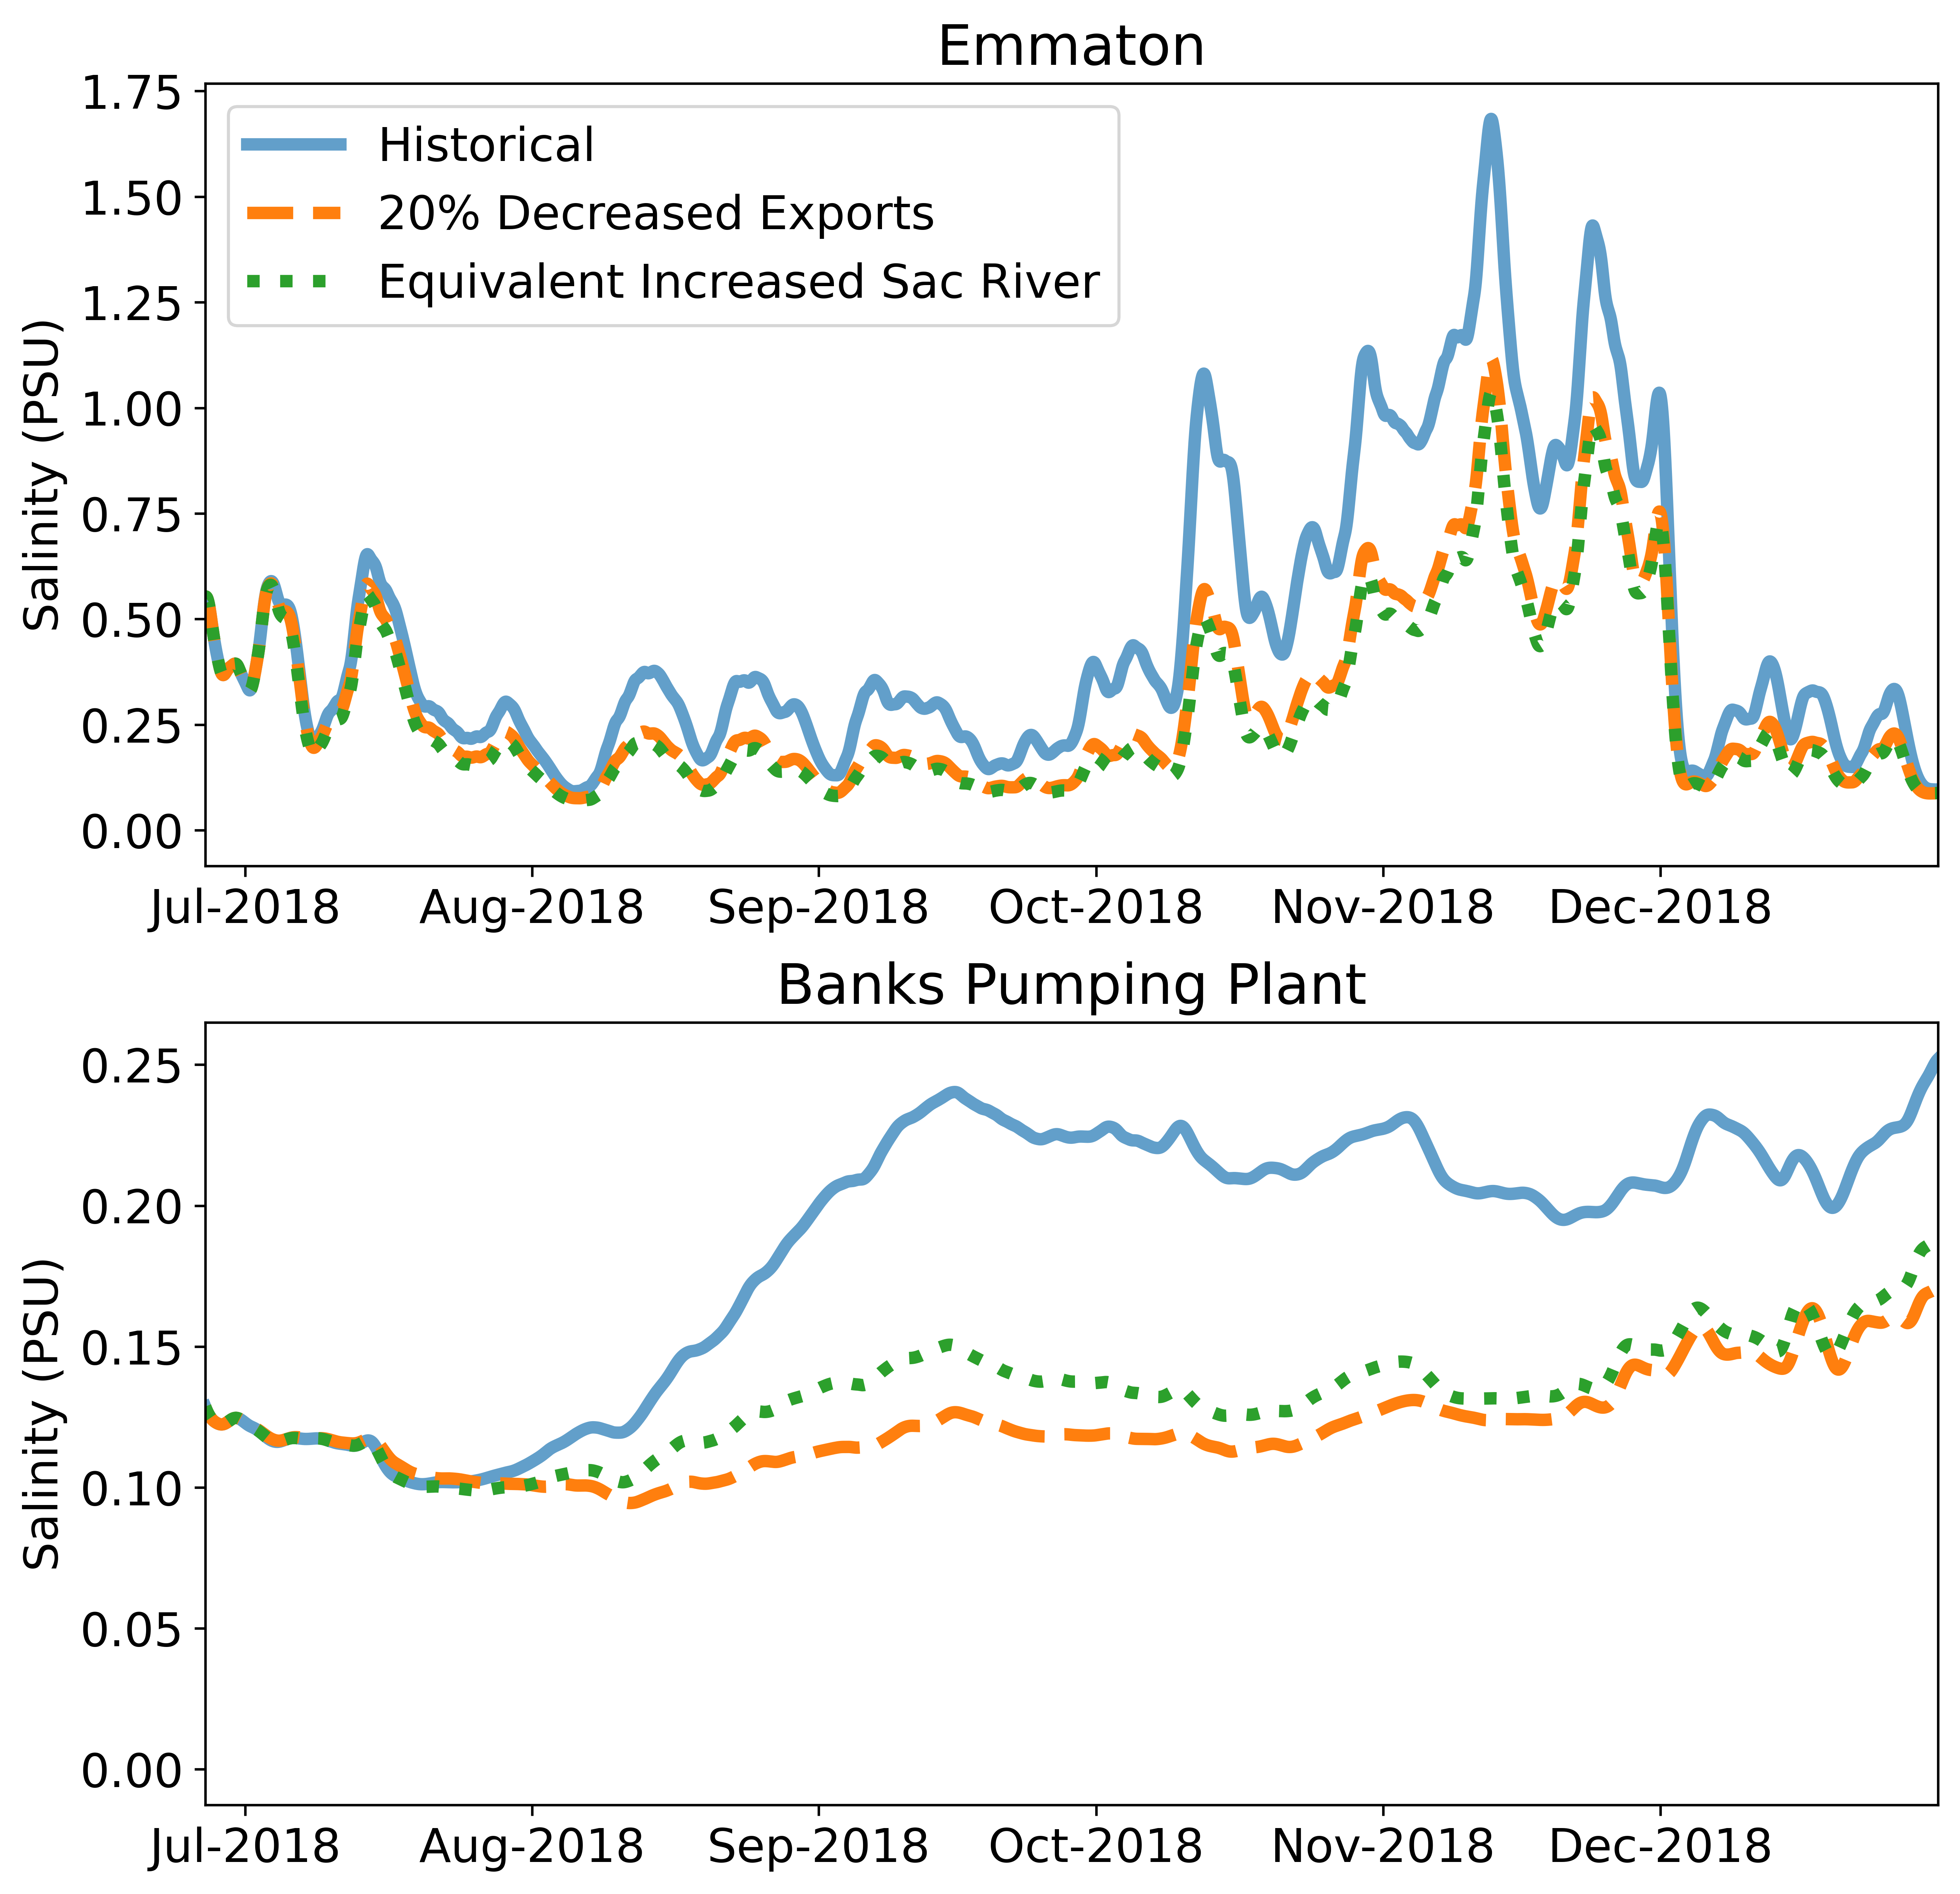

In [31]:
#try 4th order butterworth instead of average


#fig = plt.figure(figsize=(20,6))
fig, axs = plt.subplots(2, figsize=(10, 10))
mpl.rcParams.update({'font.size': 15})
ax = plt.gca()
# ax.grid(alpha=0.5)
#N=96
station_indices=[8,15]
axcount=0
for idx in station_indices:
    #apply butterworth filter from above
    
    values1=signal.sosfilt(sos,data1[str(idx)])
    values2=signal.sosfilt(sos,data2[str(idx)])
    values3=signal.sosfilt(sos,data3[str(idx)])
    
    
    axs[axcount].plot(data1.time, values1, label = 'Historical', linewidth=4, alpha =0.7)
    axs[axcount].plot(data2.time, values2, label='20% Decreased Exports',linestyle='--',linewidth=4)
    axs[axcount].plot(data3.time, values3, label='Equivalent Increased Sac River',linestyle=':',linewidth=4)

    axcount=axcount+1

#ax.plot(data1.time,np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = axs[0].legend()
#print(ax)
axs[0].set_xlim(data1.time.iloc[52000], data3.time.iloc[-1]) #July 1 to 
axs[1].set_xlim(data1.time.iloc[52000], data3.time.iloc[-1]) #July 1 to
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

axs[0].set_ylabel('Salinity (PSU)')
axs[1].set_ylabel('Salinity (PSU)')

axs[0].set_title('Emmaton')
axs[1].set_title('Banks Pumping Plant')
plt.show()
# ax.grid()

image_name = "high_res_plots/station_tseries_3_scenarios"+"."+image_format
#image_format = "svg"
fig.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)

In [24]:
#same as above but no sac river

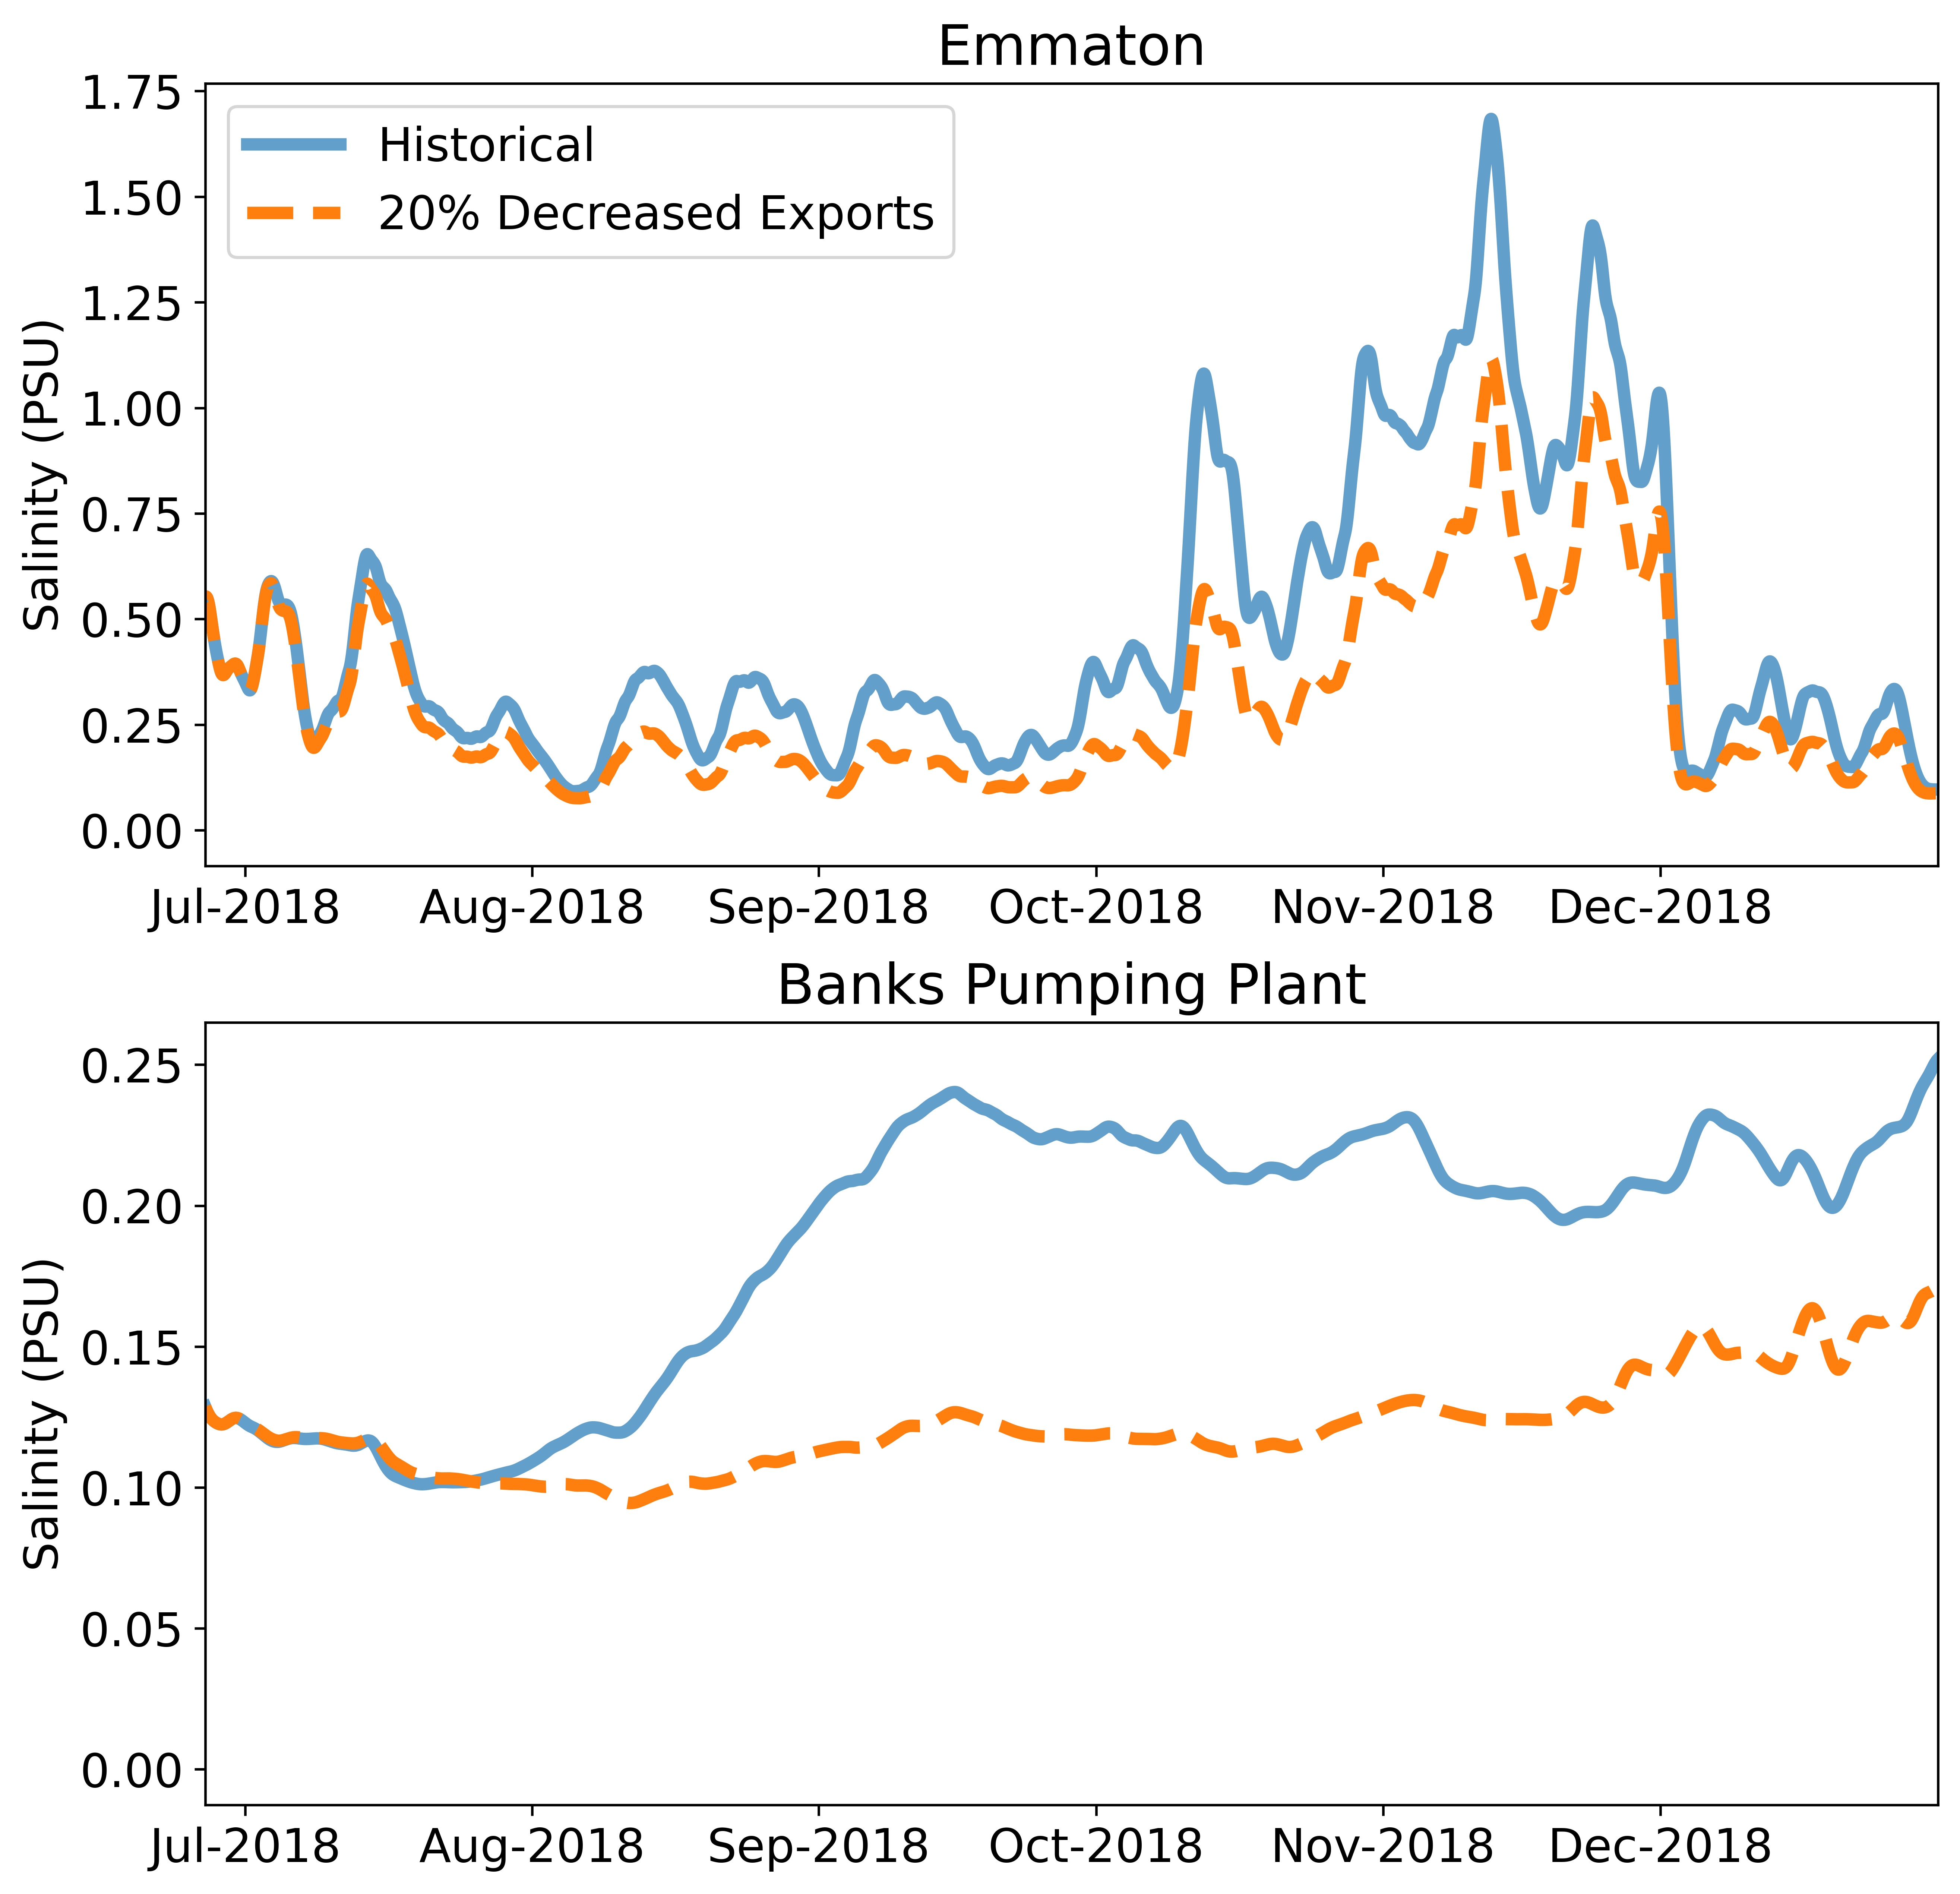

In [30]:
#try 4th order butterworth instead of average


#fig = plt.figure(figsize=(20,6))
fig, axs = plt.subplots(2, figsize=(10, 10))
# mpl.rcParams.update({'font.size': 15})
ax = plt.gca()
# ax.grid(alpha=0.5)
#N=96
station_indices=[8,15]
axcount=0
for idx in station_indices:
    #running average, currently frequency is every 15 min, so a 24 hr average would be every 96 samples
    
    values1=signal.sosfilt(sos,data1[str(idx)])
    values2=signal.sosfilt(sos,data2[str(idx)])
    values3=signal.sosfilt(sos,data3[str(idx)])
    #lose the first 96 elements so trim the time vector
    
    axs[axcount].plot(data1.time, values1, label = 'Historical', linewidth=4, alpha =0.7)
    axs[axcount].plot(data2.time, values2, label='20% Decreased Exports',linestyle='--',linewidth=4)
    #axs[axcount].plot(data3.time, values3, label='Equivalent Increased Sac River',linestyle=':',linewidth=4)

    axcount=axcount+1

#ax.plot(data1.time,np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = axs[0].legend()
#print(ax)
axs[0].set_xlim(data1.time.iloc[52000], data3.time.iloc[-1]) #July 1 to 
axs[1].set_xlim(data1.time.iloc[52000], data3.time.iloc[-1]) #July 1 to
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
axs[0].set_ylabel('Salinity (PSU)')
axs[1].set_ylabel('Salinity (PSU)')

axs[0].set_title('Emmaton')
axs[1].set_title('Banks Pumping Plant')
plt.show()
# ax.grid()

image_name = "high_res_plots/station_tseries_2_scenarios"+"."+image_format
#image_format = "svg"
fig.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)

In [20]:
#find time index of worst daily salinity
#for values from filtered data, N=0 (was previously window size for moving average)
N=0
ind1=np.argmax(values1[9000:])
print(ind1+9000)
print(data1.time.iloc[ind1+N+9000])
ind2=np.argmax(values2[9000:])
print(ind2+9000)
print(data2.time.iloc[ind2+N+9000])
ind3=np.argmax(values3[9000:])
print(ind3+9000)
print(data3.time.iloc[ind3+N+9000])
#I think they have only all reached 8/23/2014 so pick that date

70010
2018-12-31 06:45:00
70007
2018-12-31 06:00:00
69983
2018-12-31 00:00:00


In [21]:
print(data.time.iloc[0])
print(data.time.iloc[1])

2017-01-01 00:10:00
2017-01-01 00:20:00


In [22]:
#What about the Value of change in salinity on this date at emmaton,tracy PP, , and franks tract? 
station_indices=[8,55,199]
time_idx=ind3+N+9000
for idx in station_indices:
    #first index the daily average on this day (147th day after start)
    print(data2[str(idx)].iloc[time_idx]-data1[str(idx)].iloc[time_idx])
    print(data3[str(idx)].iloc[time_idx]-data1[str(idx)].iloc[time_idx])
          
    #subtract the SLR scenario from
    

-0.010380399999999998
-0.011485700000000001
-0.7191000000000001
-0.7540100000000001
-0.114786
-0.08441100000000001


In [23]:
#file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs_barotropic/staout_5"
file="//global/scratch/users/jennaisrael/run_schism/run_23/outputs/staout_5"
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("02-16-2018 00:00") + i for i in timedelta]
    
data["time"] = timestamp


FileNotFoundError: [Errno 2] No such file or directory: '//global/scratch/users/jennaisrael/run_schism/run_23/outputs/staout_5'

In [ ]:
import matplotlib.dates as mdates 
station_indices=[0, 208, 2, 62, 105]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Temperature from barotropic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.show()
# ax.grid()

In [ ]:
# pip install cartopy

In [ ]:
hgrid =xr.open_dataset("//global/scratch/users/jennaisrael/run_schism/run_8/hgrid.nc")
hgrid.head()

In [ ]:
# hgrid.make_plot(show=True)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.collections import PolyCollection
# axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
# plt.tricontour(hgrid.x, hgrid.y,hgrid.triangles, velocity, levels=10)

fig = plt.figure() 
ax = plt.gca()
ax.tripcolor(hgrid.x, hgrid.y, hgrid.triangles, velocity+100, shading='flat', vmin=0, vmax = 0.4)

pc = PolyCollection(hgrid.coords[hgrid.quads])
# quad_value = np.mean(self.values[self.quads], axis=1)
# pc.set_array(quad_value)
pc.set_array(velocity)
ax.add_collection(pc)
            
            
# hgrid.quadface(ax=ax)
ax.set_xlim(550000, 650000)
# ax.axis([550000, 650000, 4.14e6, 4.3e6])
ax.axis("scaled")
cbar = plt.colorbar(pc, orientation="horizontal")
# hgrid.triplot()
# tricontourf(self, axes=None, show=True, figsize=None, **kwargs):
#         if len(self.triangles) > 0:
#             axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
#         return axes